# ClusterAl 2021


# Ciencia de Datos - Ingenieria Industrial UTN BA
# Curso I5521


## "Establecimientos Educativos"

#### Docente: Martin Palazzo

#### Mentor: Julian Boglio

####  Grupo N°0
#### CAPDEVILA, Ailín
#### PEREZ PACE, Iñaki

El Ministerio de Educación e Innovación por medio de la Unidad de Evaluación Integral de la Calidad y Equidad Educativa y especificamente la Coordinación General de Información y Estadística Educativa, propocionó este Dataset en forma abierta donde se encuentran el listado con ubicación geográfica de los establecimientos educativos de la Ciudad.

La Ciudad de Buenos Aires consta de 15 comunas, 
21 distritos escolares, con establecimientos educativos divididos en sector privado o estatal.

<img src="distritos-escolares.png" style="width: 500px;"/>
<img src="comunas.jpg" style="width: 500px;"/>

Importamos paquetes de herramientas

In [1]:
#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')
#Aprendizaje supervisado 
from sklearn import svm, datasets, preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Importamos el data set Establecimientos educativos

In [2]:
# Establecimiento educativos Data Frame
est_educ_df = pd.read_csv('establecimientos_educativos_WGS84.csv')

Conocemos el tamaño del data frame

In [3]:
est_educ_df.shape

(2880, 27)

Conocemos las columnas del dataframe

In [4]:
# columnas del dataframe
print(est_educ_df.columns.values)
print('_'*50)
print(est_educ_df.info())

['cui' 'cueanexo' 'cue' 'anexo' 'sector' 'dom_edific' 'dom_establ'
 'nombre_est' 'nombre_abr' 'telefono' 'email' 'codpost' 'web_megcba'
 'nivmod' 'nivelmodal' 'tipest_abr' 'tipest' 'depfun' 'depfun_otr' 'de'
 'comuna' 'barrio' 'area_progr' 'estado' 'point_x' 'point_y' 'Nivel']
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 27 columns):
cui           2880 non-null int64
cueanexo      2880 non-null int64
cue           2880 non-null int64
anexo         2880 non-null int64
sector        2880 non-null float64
dom_edific    2880 non-null object
dom_establ    2880 non-null object
nombre_est    2880 non-null object
nombre_abr    2879 non-null object
telefono      2879 non-null object
email         2867 non-null object
codpost       2880 non-null object
web_megcba    2861 non-null object
nivmod        2880 non-null object
nivelmodal    2880 non-null object
tipest_abr    2847 non-null object
tipest 

### MACHINE LEARNING

Comenzaremos acondicionando el dataframe para trabajar con variables numéricas.



In [5]:
# Cantidad de valores nulos ordenados descendentemente
total = est_educ_df.isnull().sum().sort_values(ascending=False)
# Porcentaje de lo que representa para cada columna
percent = (est_educ_df.isnull().sum()/est_educ_df.isnull().count()).sort_values(ascending=False)
# Mostramos los 2 resultados en conjunto.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
depfun,33,0.011458
tipest_abr,33,0.011458
web_megcba,19,0.006597
email,13,0.004514
nombre_abr,1,0.000347
telefono,1,0.000347


In [6]:
# Limpiamos registros '.dropna'
est_educ_df.dropna(how ='any', inplace = True)
# Verificamos como quedo el dataset
print(f'Nos quedamos con un dataframe de {est_educ_df.shape[0]} filas x {est_educ_df.shape[1]} columnas')

Nos quedamos con un dataframe de 2825 filas x 27 columnas


Existen valores en la coordenadas que se encuentran fuera de escala por lo que se desea eliminarlos

In [7]:
# Elimino outliers
esteduc_df = est_educ_df[est_educ_df['point_y'] > 8000 ]

In [8]:
esteduc_df['sector'] = esteduc_df['sector'].map({1 : 0 ,2 : 1})

### CLASIFICACIÓN_1

El objetivo incial será predecir si el establecimiento será estatal o publico segun coordenadas x e y. 
Trabajaremos con modelos de SVM y KNN para luego medir su performance y elegir el mejor. 

In [9]:
# Nombre de columnas
column_1_names = ['point_x', 'point_y']
# Columna target
targets_1_name = ['sector']
# Nombres de columnas que no estan en el target
features_1_names = [i_c for i_c in column_1_names if i_c not in targets_1_name]
print('Features:',features_1_names)
print('Target:',targets_1_name)

Features: ['point_x', 'point_y']
Target: ['sector']


In [10]:
# 1) Separamos lo que son las features del target.
features_1 = esteduc_df[features_1_names]           
target_1 = esteduc_df[targets_1_name]
# Guardamos feature matrix en "X_1"
X_1 = features_1.values
# Guardamos target vector in "Y_1"
Y_1 = target_1.values 
print(Y_1.shape)
print(X_1.shape)

(2821, 1)
(2821, 2)


In [11]:
#Split train & test
# Separar train y test
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(X_1, Y_1, test_size=0.3, random_state=1)
#random_state: seed utilizada para poder replicar el experimento ya que la funcion tiene
#componentes aleatorios
#test_size: numero entre 0 y 1 e indicar la proporcion del dataset que va a ser test. 
print(x_1_train.shape)
print(y_1_train.shape)

(1974, 2)
(1974, 1)


In [12]:
# observamos como queda la matriz de xtrain
x_1_train.shape

(1974, 2)

In [13]:
# observamos como queda la matriz de xtest
x_1_test.shape

(847, 2)

In [14]:
#Creamos el modelo Support Vector Classification (SVC)
svc = svm.SVC()

# Hyperparametros
parameters = {'kernel':('linear', 'rbf'),
              'C':[1, 10, 100, 1000],
              'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}
# 
clf = GridSearchCV(svc, # modelo
                   param_grid = parameters, # Hyperparametros
                   refit = True, # refit nos devuelve el modelo con los mejores parametros encontrados 
                   cv = 5, # cv indica la cantidad de folds
                   verbose=1)
clf.fit(x_1_train, y_1_train.ravel())

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  3.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [15]:
# Toda la informacion del entrenamiento esta en cv_results_
scores = clf.cv_results_
#Veamosla ...
pd.DataFrame.from_dict(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.967020,0.244946,0.002398,4.900183e-04,1,0.0001,linear,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.628788,0.627848,...,0.638804,0.014781,36,0.637516,0.642179,0.637112,0.643671,0.630380,0.638171,0.004660
1,0.139132,0.005479,0.026591,5.004542e-04,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.696970,0.716456,...,0.696555,0.011936,4,0.975919,0.970868,0.975934,0.975316,0.980380,0.975683,0.003017
2,0.889459,0.215998,0.002798,3.977099e-04,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.628788,0.627848,...,0.638804,0.014781,36,0.637516,0.642179,0.637112,0.643671,0.630380,0.638171,0.004660
3,0.136699,0.002362,0.026777,3.963806e-04,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.676768,0.686076,...,0.682371,0.005458,5,0.993663,0.991767,0.993667,0.993671,0.994937,0.993541,0.001014
4,0.896195,0.227318,0.001999,8.869684e-07,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.628788,0.627848,...,0.638804,0.014781,36,0.637516,0.642179,0.637112,0.643671,0.630380,0.638171,0.004660


In [16]:
print(clf.score(x_1_test,y_1_test.ravel()))

0.7225501770956316


In [17]:
# Prediction sobre las muestras de test
y_1_pred = clf.predict(x_1_test)
print(y_1_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 

In [20]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(y_1_test, y_1_pred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.7225501770956316


KNN

In [21]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_1_train, y_1_train)
y_1_pred = neigh.predict(x_1_test)
test_1_acc = accuracy_score(y_1_test, y_1_pred)
print("El accuracy es " + str(test_1_acc))

El accuracy es 0.7154663518299882


In [22]:
#compute and plot AUC
yproba_1 = neigh.predict_proba(x_1_test)
fpr_1, tpr_1, thresholds = roc_curve(y_1_test.astype('int'), yproba_1[:,1], drop_intermediate = False)
auc_1 = metrics.auc(fpr_1, tpr_1)
print("El AUC es = " + str(auc_1))

El AUC es = 0.7172397189428255


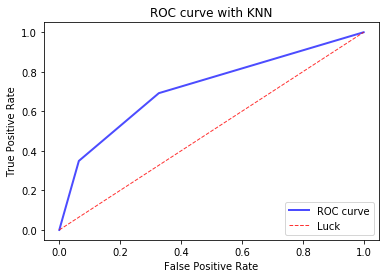

In [23]:
plt.plot(fpr_1, tpr_1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN')
plt.show()

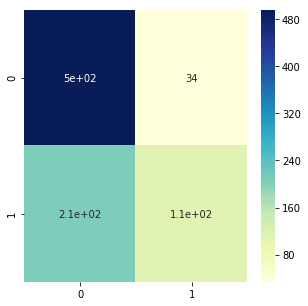

In [24]:
cm_1 = confusion_matrix(y_1_test, y_1_pred)
df_cm_1 = pd.DataFrame(cm_1, index = [i for i in np.unique(Y_1)],columns = [i for i in np.unique(Y_1)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm_1, annot=True, cmap="YlGnBu")
plt.show()

Se puede observar que su performance no es muy buena ya que la forma en la que se distribuyen los estatales y privados fue estudiada en el analisis exploratorio y era muy dificil visualmente de separar.

In [25]:
#traducimos cada uno de los valores 0 y 1 a lo que representan realmente
esteduc_df['sector'] = esteduc_df['sector'].map({0 : 'Estatal' ,1 : 'Privado'})

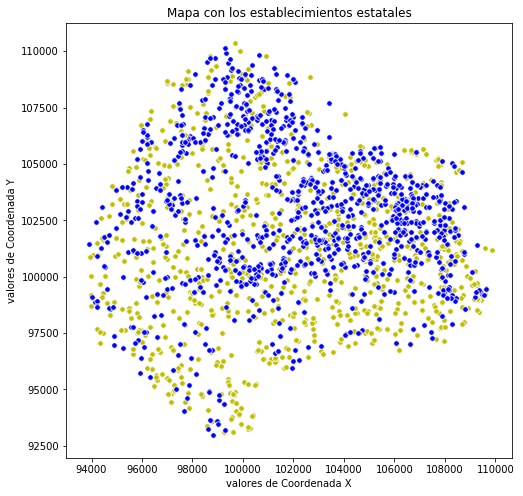

In [26]:
# Divido mi DataSet por Establecimientos Estatales y Privados
esteduc_estatal_df = esteduc_df[ esteduc_df['sector'] == 'Estatal' ]
esteduc_privado_df = esteduc_df[ esteduc_df['sector'] == 'Privado' ]
#Impresion del Grafico
plt.figure(figsize=(8,8))
sns.scatterplot( x= esteduc_estatal_df.point_x.values , y= esteduc_estatal_df.point_y.values, s=30, color="y")
sns.scatterplot( x= esteduc_privado_df.point_x.values , y= esteduc_privado_df.point_y.values , s=30, color="b")
plt.title("Mapa con los establecimientos estatales")
plt.xlabel("valores de Coordenada X")
plt.ylabel("valores de Coordenada Y")
plt.show()

NUEVA CLASIFICACIÓN
El nuevo objetivo será predecir la comuna en la cual esta situada el Establecimiento establecimiento segun coordenadas x e y. Trabajaremos con modelos de SVM y KNN para luego medir su performance y elegir el mejor.

In [27]:
# Nombre de columnas
column_names = ['point_x', 'point_y']
# Columna target
targets_name = ['comuna']
# Nombres de columnas que no estan en el target
features_names = [i_c for i_c in column_names if i_c not in targets_name]
print('Features:',features_names)
print('Target:',targets_name)

Features: ['point_x', 'point_y']
Target: ['comuna']


In [28]:
# 1) Separamos lo que son las features del target.
features = esteduc_df[features_names]           
target = esteduc_df[targets_name]
# Guardamos feature matrix en "X"
X = features.values
# Guardamos target vector in "Y"
Y = target.values 
print(Y.shape)
print(X.shape)

(2821, 1)
(2821, 2)


In [29]:
#Label Encoder
# Transformamos el label del target en formato numerico para poder procesarlo

# Importamos preprocessing de la libreria scikit-learn (a.k.a. sklearn)
from sklearn import preprocessing

# 1 - Primero creo un objeto (con determinados argumentos) que llama a la funcion que deseo
le = preprocessing.LabelEncoder()

# 2 - AL objeto le aplico la funcion fit a los datos desados 
Y = le.fit_transform(Y.ravel()) #.ravel() para evitar el warning!

# 3 - Agregamos la nueva columna a nuestro DataFrame
esteduc_df['comuna'] = Y

print('Response variable after encoding:',Y)
esteduc_df.tail(10)

Response variable after encoding: [ 7  6 13 ...  0  9  7]


,cui,cueanexo,cue,anexo,sector,dom_edific,dom_establ,nombre_est,nombre_abr,telefono,...,depfun,depfun_otr,de,comuna,barrio,area_progr,estado,point_x,point_y,Nivel
2868,200795,20245849,202458,49,Estatal,Manuel Porcel de Peralta 1437,Manuel Porcel de Peralta 1437,Primera Infancia Espacio EEM N°2/17°,PI EEM 02/17,S/D,...,Subsecretaría de Coordinación Pedagógica y Equ...,1,17.0,9,VILLA REAL,11 - HOSP VELEZ SARSFIELD,1,93922.057628,100884.606275,Otros Servicios Educativos de la modalidad Común
2869,200223,20310300,203103,0,Estatal,Avda. Suárez 1851,Avda. Suárez 1851,Centro Educativo Complementario de Natación N° 05,CEC Natación 05,S/N,...,Dirección de Educación Primaria,1,5.0,3,BARRACAS,02 - HOSP ARGERICH,2,107903.580104,98882.800382,Otros Servicios Educativos de la modalidad Común
2870,200547,20274213,202742,13,Estatal,Avda. del Libertador 8209,Avda. del Libertador 8151,Escuela de Maestros Centro Cultural De La Memoria,EdeM CCDLM,4772-4028/4039,...,Dirección General Escuela de Maestros,1,10.0,12,NUÑEZ,07 - HOSP PIROVANO,1,99873.530888,109992.000351,Superior No Universitario Común - Otros Servic...
2871,202670,20310400,203104,0,Estatal,San José 255,San José 255,Centro de Formación Profesional - Fundación Ex...,CFP F.Excelencia,4381-5937,...,Gerencia Operativa de Formación Profesional,1,3.0,0,MONTSERRAT,08 - HOSP RAMOS MEJIA,1,106997.277926,101968.493193,Otros Servicios Educativos de la modalidad Com...
2872,202134,20308600,203086,0,Estatal,Villa 31 Parcela 1P Mza. 162 Sec. 15 Circ. 19,Villa 31 Parcela 1P Mza. 162 Sec. 15 Circ. 19,Jardín de Infantes Integral N° 10/01°,JII 10/01,38610341,...,Dirección de Educación Inicial,1,1.0,0,RETIRO,04 - HOSP FERNANDEZ,1,106667.070328,105602.861029,Inicial Común
2873,200332,20308200,203082,0,Estatal,Venezuela 3259,Venezuela 3259,CENOF Centro Rincón de Venezuela,CENOF Rincón de Venezuela,4861-1869,...,Gerencia Operativa de Educación para el Desarr...,1,6.0,2,BALVANERA,08 - HOSP RAMOS MEJIA,2,104647.290490,101463.155880,Otros Servicios Educativos de la modalidad de ...
2874,202245,20308300,203083,0,Estatal,Avda. Juan de Garay 2900,Avda. Juan de Garay 2900,CENOF Centro Seis Esquinas,CENOF 6 Esquinas,4323-9350,...,Gerencia Operativa de Educación para el Desarr...,1,6.0,3,PARQUE PATRICIOS,05 - HOSP PENNA,2,105256.085374,100046.041447,Otros Servicios Educativos de la modalidad de ...
2875,202657,20308500,203085,0,Estatal,Villa 31 Bis Mza. 109 Playón Este,Villa 31 Bis Mza. 109 Playón Este B° San Martín,CENOF Centro Retiro CEDEL,CENOF CEDEL,5030-9490 int.11,...,Gerencia Operativa de Educación para el Desarr...,1,1.0,0,RETIRO,04 - HOSP FERNANDEZ,2,107746.306620,104891.331613,Otros Servicios Educativos de la modalidad de ...
2876,201564,20244301,202443,1,Privado,Cnel. Ramón L. Falcón 4080,Cnel. Ramón L. Falcón 4080,Inst. Superior de Formación Integral (ISFI),I.S. ISFI,S/D,...,Dirección General de Educación de Gestión Privada,1,11.0,9,VELEZ SARSFIELD,06 - HOSP PIÑERO,1,98047.072088,99320.432796,Superior No Universitario Común - Otros Servic...
2877,202687,20312700,203127,0,Estatal,Zuviría 6590,Zuviría 6590,Esc. Primaria N° 24,EPjc 24,S/D,...,Dirección de Educación Primaria,1,20.0,7,VILLA LUGANO,09 - HOSP SANTOJANNI,1,97272.012176,94961.940140,Primario Común


In [30]:
#Split train & test
# Separar train y test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
#random_state: seed utilizada para poder replicar el experimento ya que la funcion tiene
#componentes aleatorios
#test_size: numero entre 0 y 1 e indicar la proporcion del dataset que va a ser test. 
print(x_train.shape)
print(y_train.shape)

(1974, 2)
(1974,)


In [31]:
# observamos como queda la matriz de xtrain
x_train.shape

(1974, 2)

In [32]:
# observamos como queda la matriz de xtest
x_test.shape

(847, 2)

SUPPORT VECTOR MACHINES
Se realiza Grid Search y Cross Validation para seleccionar los hiperparámetros óptimos.

Se trabaja con Kermels lineal y rbf (gausseano) y valor diferentes de "C" y "gamma".

In [33]:
#Creamos el modelo Support Vector Classification (SVC)
svc = svm.SVC()

# Hyperparametros
parameters = {'kernel':('linear', 'rbf'),
              'C':[1, 10, 100, 1000],
              'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}
# 
clf = GridSearchCV(svc, # modelo
                   param_grid = parameters, # Hyperparametros
                   refit = True, # refit nos devuelve el modelo con los mejores parametros encontrados 
                   cv = 5, # cv indica la cantidad de folds
                   verbose=1)
clf.fit(x_train, y_train.ravel())

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [34]:
# Toda la informacion del entrenamiento esta en cv_results_
scores = clf.cv_results_
#Veamosla ...
pd.DataFrame.from_dict(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.070768,0.018073,0.002598,0.000490,1,0.0001,linear,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.9250,0.924623,...,0.933131,0.009924,15,0.947903,0.949239,0.939873,0.93426,0.936237,0.941503,0.00606
1,0.253056,0.010259,0.039382,0.004326,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.6775,0.685930,...,0.689970,0.023890,32,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.00000
2,0.066160,0.012667,0.002000,0.000002,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.9250,0.924623,...,0.933131,0.009924,15,0.947903,0.949239,0.939873,0.93426,0.936237,0.941503,0.00606
3,0.287643,0.007242,0.039372,0.000488,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.4950,0.520101,...,0.510638,0.024010,36,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.00000
4,0.069560,0.014949,0.002597,0.000491,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.9250,0.924623,...,0.933131,0.009924,15,0.947903,0.949239,0.939873,0.93426,0.936237,0.941503,0.00606


In [35]:
print("El mejor parametro es %s con una performance de %0.2f" % (clf.best_params_, clf.best_score_))

El mejor parametro es {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'} con una performance de 0.93


In [36]:
print(clf.score(x_test,y_test.ravel()))

0.9433293978748524


In [37]:
# Prediction sobre las muestras de test
y_pred = clf.predict(x_test)
print(y_pred)

[ 0  0 10  9  7  3  4  5  7  6 10  5  2 10  1  4  7  9  7  3  2  8 12  9
 11  7  0  9  3 11  0  3  6  2 14 12  7  8 14  5  1  9  1  0  7  6  4 11
 11  3  2  3  5 10 12  1  1  1 14 13  3 11  8  4  0 10 11  3  5 14 12  7
  0  6 10  1  1  7  0  8 12  0 13  6  7  2  2  6  2  6  2  5 11  9  0 13
  7 13  3  2  2  7 11  4  3  3 10 10 10  8 12  9  3 10  7 14 13  9  4  6
  3 10  8  0  9  7  0  1  2  9 10  3  4  0 12  6 13  3 12 10  1 13  9  2
  3 14  9  3  0 13  9  0  6  7  6  3 12  3  5 13  0  0  6  2  9  3  2 13
  5  1  7  8  2  7  8 12 14  1  0  0  6 13  8 11  9  8  0  0  4 12  5  0
  0  6  4  6  0  7  5 10  4 13  9 13  2 11  4  1  2 13  0  0  9  7  5  6
 10 12  6  1  5 10  6  1  7  8  3  8 12  2  1  4  6  7  5  1 11  6  5  0
  2  3 10 10 14  0  3  0  2 12  2  6  3  7  7  0  4  3 13  2 13  0 14  8
  2  9  3 12 11  7  6  8  2  8  2  7  3 12  0  7 12  6  8 14 11  3 13  6
 14  7 13  2  9 13  6  0  7 10 13  9 12 13 14 12 12  0  6  5  6 13  3  9
  0  4 10  5 14  0  5  3  0 10  3  3 13 13  0 13 14

La matriz de confusión nos ayudará a ver el desempeño del algoritmo empleado para clasificar, identificando si el sistema está confundiendo dos clases. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real.

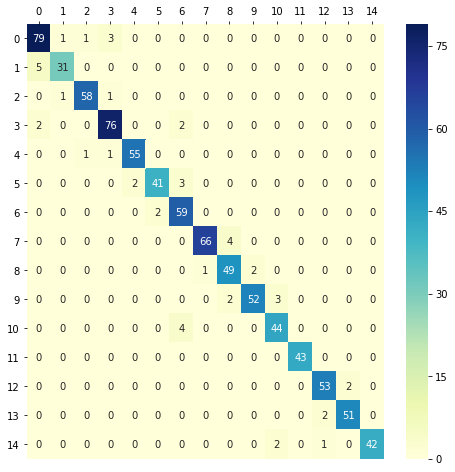

In [38]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, #Valores
                     index = [i for i in np.unique(Y)], # rows
                     columns = [i for i in np.unique(Y)]) # Column
plt.figure(figsize = (8,8))
ax = sns.heatmap(df_cm, annot=True, cmap="YlGnBu")
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.show()

In [39]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(y_test, y_pred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.9433293978748524


MODELO KNN
Pruebo a ver su consigo mejor accuracy.

Se estimó el hiperparámetro manualmente, evaluando cómo influía en la accuracy.

In [40]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.9775678866587958


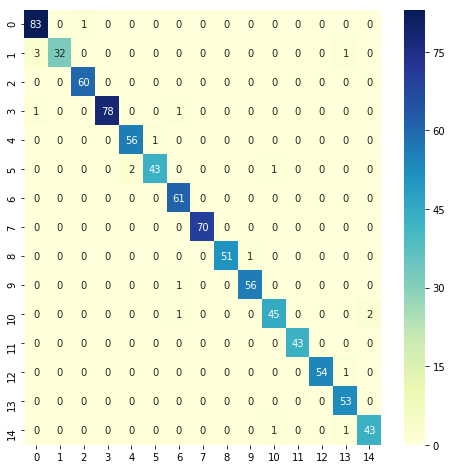

In [41]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in np.unique(Y)],columns = [i for i in np.unique(Y)])
plt.figure(figsize = (8,8))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")
plt.show()

In [42]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(y_test, y_pred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.9775678866587958


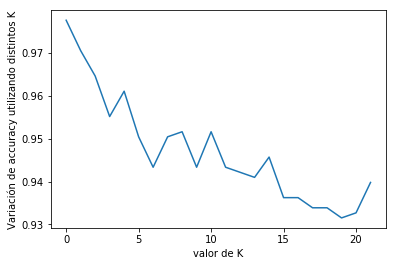

In [43]:
iteraciones_knn = 22
acc_knn = np.zeros(iteraciones_knn)
for r in range(0,iteraciones_knn):
    neigh = KNeighborsClassifier(n_neighbors=r+1)
    neigh.fit(x_train,y_train)
    y_pred_knn = neigh.predict(x_test)
    acc_knn[r] = accuracy_score(y_test, y_pred_knn)
    
plt.plot(acc_knn)
plt.xlabel("valor de K")
plt.ylabel("Variación de accuracy utilizando distintos K")
plt.show()